In [1]:
import numpy as np
import pandas as pd
from neo4j_runway import Discovery, GraphDataModeler, IngestionGenerator, LLM, PyIngest
from IPython.display import display, Markdown, Image
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

True

In [2]:


OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Multi-agent Collaboration"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "ls__3b0b4639413547b1992222420ad58d30"
os.environ["GPT_MODEL"] = "gpt-3.5-turbo"

# Neo4j 연결 정보 설정
NEO4J_URL = os.environ["NEO4J_URI"] = "neo4j+s://9bb7f8ec.databases.neo4j.io"
NEO4J_ID = os.environ["NEO4J_USERNAME"] = "neo4j"
NEO4J_PASSWORD = os.environ["NEO4J_PASSWORD"] = (
    "6divqnk_LBw-7zrAsvxNXvVCirJwboIbfSnU0FSYkCw"
)
csv_file1 = "/home/rbrain/data_agent/data/LG0429_.csv"

test_df = pd.read_csv(csv_file1)

In [3]:

test_df.columns = test_df.columns.str.strip()
for i in test_df.columns:
    test_df[i] = test_df[i].astype(str)
test_df.to_csv("/home/rbrain/data_agent/data/LG0429_prepared.csv", index=False)

DATA_DESCRIPTION = {
    "충돌을 나타내는 고객의 발화": "고객이 충돌 증상에 대해 표현한 발화",
    "충돌의 원인": "고객의 충돌 증상에 대한 원인을 표현한 말",
    "조치 방안": "고객의 충돌 증상에 대한 원인을 해결하기 위한 조치 방안",
    "자가조치 가능여부": "고객이 충돌 증상에 대한 원인을 스스로 조치 가능한지에 대한 여부(True/False)",
    "자가조치 시 매뉴얼 참조여부": "고객이 스스로 조치 시, 매뉴얼을 참조해야 하는지에 대한 여부(True/False)",
    "자가조치 참조방법": "고객이 스스로 조치 할 때, 어떤 방법을 사용해야하는지에 대한 설명",
    "출동 필요여부": "고객이 스스로 조치가 불가능하여, AS직원 출동 필요 여부(True/False)",
    "출동 담당업체": "AS출동 담당 업체에 대한 설명",
}
llm = LLM(model="gpt-4o")

disc = Discovery(llm=llm, user_input=DATA_DESCRIPTION, data=test_df)
disc.run()

/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/neo4j_runway/discovery/discovery.py:49: UserWarning: user_input should include key:value pair {general_description: ...} for best results. Found keys dict_keys(['충돌을 나타내는 고객의 발화', '충돌의 원인', '조치 방안', '자가조치 가능여부', '자가조치 시 매뉴얼 참조여부', '자가조치 참조방법', '출동 필요여부', '출동 담당업체'])
  warnings.warn(


Based on the provided summary of the data, here is a preliminary analysis:

### Overall Details:
1. **Data Structure**:
   - The dataset consists of 10 entries and 8 columns.
   - All columns are of type `object`, indicating that they contain categorical data or text.

2. **Missing Values**:
   - There are no missing values in the dataset, which is beneficial for analysis and modeling.

3. **Unique Values**:
   - The number of unique values varies across columns, indicating different levels of variability in the data.

### Feature Analysis:
1. **충돌을 나타내는 고객의 발화 (Customer's Utterance Indicating Collision)**:
   - Unique values: 9
   - Most frequent value: "룸 진입 시 충돌 위험" (2 occurrences)
   - This feature captures the customer's description of the collision symptoms, which is crucial for understanding the context of the issue.

2. **충돌의 원인 (Cause of Collision)**:
   - Unique values: 7
   - Most frequent value: "자율주행 오류(멈춤, 금지구역침범 등)" (2 occurrences)
   - This feature identifies the cause of the collision, which is essential for diagnosing the problem.

3. **조치 방안 (Action Plan)**:
   - Unique values: 7
   - Most frequent value: "맵 수정 (금지구역 및 Node 수정 등)" (2 occurrences)
   - This feature outlines the action plan to resolve the collision issue, which is important for determining the solution.

4. **자가조치 가능여부 (Self-Action Feasibility)**:
   - Unique values: 2 (True/False)
   - Most frequent value: False (7 occurrences)
   - This feature indicates whether the customer can resolve the issue themselves, which is critical for understanding the need for external assistance.

5. **자가조치 시 매뉴얼 참조여부 (Manual Reference for Self-Action)**:
   - Unique values: 2 (True/False)
   - Most frequent value: False (7 occurrences)
   - This feature shows whether the customer needs to refer to a manual for self-action, which is relevant for support documentation.

6. **자가조치 참조방법 (Self-Action Reference Method)**:
   - Unique values: 3
   - Most frequent value: "nan" (7 occurrences)
   - This feature describes the method for self-action, but the high frequency of "nan" suggests that this information is often not provided or not applicable.

7. **출동 필요여부 (Need for On-Site Assistance)**:
   - Unique values: 2 (True/False)
   - Most frequent value: True (7 occurrences)
   - This feature indicates whether on-site assistance is required, which is important for resource allocation.

8. **출동 담당업체 (On-Site Assistance Provider)**:
   - Unique values: 3
   - Most frequent value: "KT" (4 occurrences)
   - This feature identifies the service provider for on-site assistance, which is useful for operational logistics.

### Important Features:
1. **충돌을 나타내는 고객의 발화 (Customer's Utterance Indicating Collision)**: Provides context and initial description of the issue.
2. **충돌의 원인 (Cause of Collision)**: Essential for diagnosing the problem.
3. **조치 방안 (Action Plan)**: Critical for determining the solution.
4. **자가조치 가능여부 (Self-Action Feasibility)**: Indicates the need for external assistance.
5. **출동 필요여부 (Need for On-Site Assistance)**: Important for resource allocation and operational planning.

### Summary:
The dataset provides a comprehensive view of collision issues reported by customers, including their descriptions, causes, and action plans. The features related to self-action feasibility and the need for on-site assistance are particularly important for operational decision-making. The variability in the data suggests that there are multiple types of issues and solutions, which could be further explored in a detailed analysis.

recieved a valid response


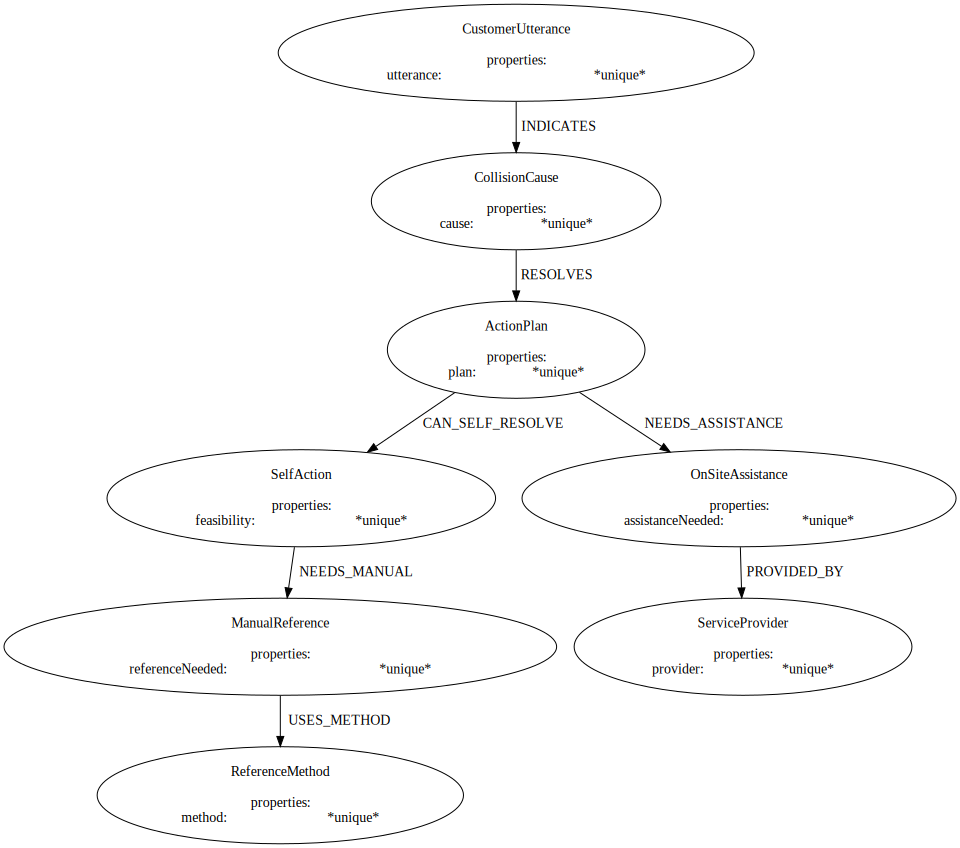

In [4]:

# instantiate graph data modeler
gdm = GraphDataModeler(llm=llm, discovery=disc)

# generate model
gdm.create_initial_model()

# visualize the data model
gdm.current_model.visualize()

In [5]:
# instantiate ingestion generator
gen = IngestionGenerator(data_model=gdm.current_model, 
                         username="neo4j", 
                         password=NEO4J_PASSWORD,
                         uri=NEO4J_URL,
                         database="neo4j", 
                         csv_dir="/home/rbrain/data_agent/data", 
                         csv_name="LG0429_prepared.csv")

# create ingestion YAML 
pyingest_yaml = gen.generate_pyingest_yaml_string()

# save local copy of YAML
gen.generate_pyingest_yaml_file(file_name="LG0429_prepared")

In [6]:
PyIngest(yaml_string=pyingest_yaml, dataframe=test_df)


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/neo4j_runway/ingestion/pyingest.py:159: UserWarning: the yaml_string parameter will be depreciated in future releases. Please use the 'config' kwarg to identify the YAML file instead.
  warnings.warn(


File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:14.177391


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:14.404649
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:14.406213
{} : Completed file 2024-07-15 10:35:14.554997
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:14.556069


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:14.702068
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:14.703178
{} : Completed file 2024-07-15 10:35:14.856873
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:14.857922


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:14.997188
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:14.998257
{} : Completed file 2024-07-15 10:35:15.186034
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:15.187090


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:15.334114
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:15.335187
{} : Completed file 2024-07-15 10:35:15.479503
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:15.480540


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:15.712954
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:15.714019
{} : Completed file 2024-07-15 10:35:15.890555
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:15.891612


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:16.055250
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:16.056298


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:16.292107
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:16.293166


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:16.531036
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:16.532092
{} : Completed file 2024-07-15 10:35:16.706493
File {} .///home/rbrain/data_agent/dataLG0429_prepared.csv
loading... 0 2024-07-15 10:35:16.707543


/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/home/rbrain/miniconda3/envs/data_agent_test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{} : Completed file 2024-07-15 10:35:16.867193


In [8]:
import warnings
import json
from langchain_community.graphs import Neo4jGraph

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

import textwrap

NEO4J_USERNAME = "neo4j"
NEO4J_DATABASE = 'neo4j'
NEO4J_URI = 'neo4j+s://9bb7f8ec.databases.neo4j.io'
NEO4J_PASSWORD = '6divqnk_LBw-7zrAsvxNXvVCirJwboIbfSnU0FSYkCw'

kg = Neo4jGraph(
    url=NEO4J_URI, username=NEO4J_USERNAME, password=NEO4J_PASSWORD, database=NEO4J_DATABASE
)

kg.refresh_schema()
print(textwrap.fill(kg.schema, 60))
schema=kg.schema

NameError: name 'textwrap' is not defined